In [5]:
%matplotlib inline
import numpy as np
import math
from scipy import stats, special, signal
from matplotlib import pyplot as plt

# "Probability, Distributions, and Statistical Questions"

## Problem 1 - Gamma-Ray Convolution

### Quick notes on convolution... in measuring a phenomena, there is the phenomena itself, and a background signal, each with their own PDF. The convolved PDF is one which combines those PDF's in a way which can illustrate how overall shape is affected. Convolution can even be the same PDF integrated over a number of days.

$$ P_{A+B}(x) = \int P_{A}(z)P_{B}(x-z)dz = P_{A}(x) \times P_{B}(x) $$

### In looking for gamma-ray sources, there will be a background of discrete noise terms in our images that follow a Poisson distribution. In detecting a gamma-ray signal, we must calculate the probability that the background gives us a measurement as signal-like or higher than the signal received. 

### I assume that the average cosmic-ray background on day 1 is 2 blips, and I posit that a signal of 4 or more blips on average per day corresponds to a signal emitted by our gamma-ray candidate.

A - talk abt how the shape changes, general convolution stuff (use 'full')
B - talk abt how its still a Poisson instead of a Gaussian

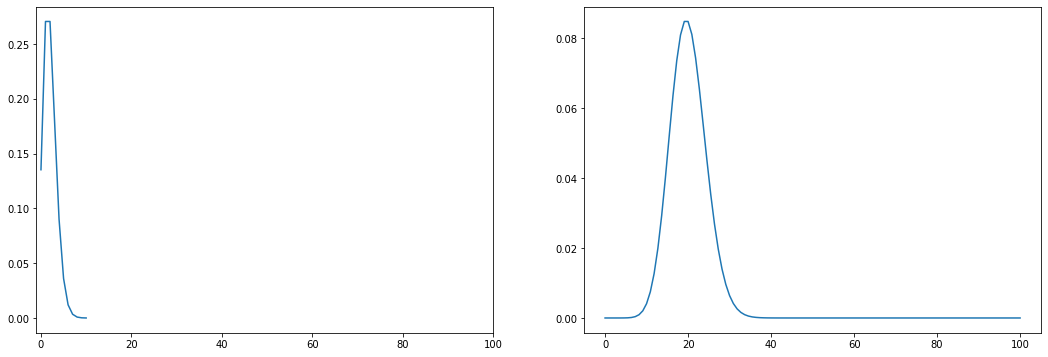

In [66]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18,6) 

blipmin,blipmax = 0,10
blips = np.linspace(blipmin,blipmax,blipmax+1)
noise = stats.poisson.pmf(k=blips,mu=2)

conv = noise
days = 10
for i in range(days):
    conv = signal.fftconvolve(noise,conv,mode='full')

ax[0].plot(blips,noise)
ax[0].set_xlim(days*blipmin-1,days*blipmax)

x = np.linspace(days*blipmin,days*blipmax,len(conv))
ax[1].plot(x,conv)

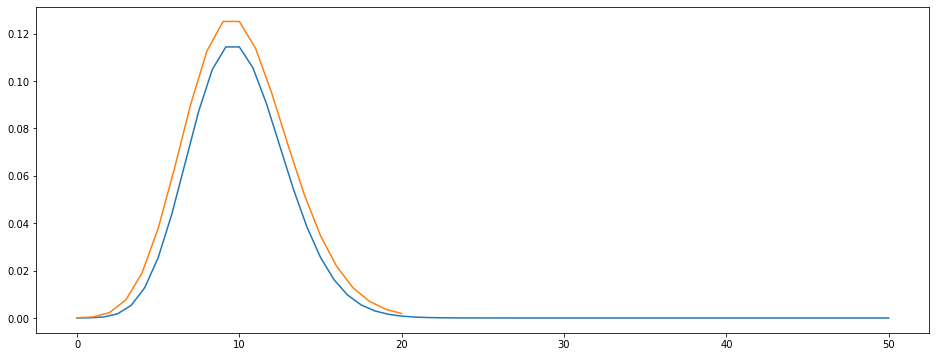

In [62]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(16,6) 

blipmin,blipmax = 0,10
blips = np.linspace(blipmin,blipmax,blipmax+1)
noise = stats.poisson.pmf(k=blips,mu=2)

conv = noise
days = 5
for i in range(days):
    conv = signal.fftconvolve(noise,conv,mode='full')

x = np.linspace(days*blipmin,days*blipmax,len(conv))
ax.plot(x,conv)
xfit = np.linspace(0,20,21)
ax.plot(xfit,stats.poisson.pmf(k=xfit,mu=10))